In [16]:
# !pip install rdkit
# 3. Step-by-Step Implementation
# Step 1: Data Cleaning & Preprocessing
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors


# Load dataset
df = pd.read_csv('delaney_train.csv')
df.head()

# Calculate molecular descriptors using RDKit
def compute_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol_weight = Descriptors.MolWt(mol)
    logP = Descriptors.MolLogP(mol)
    return mol_weight, logP

df[['MolWeight', 'LogP']] = df['smiles'].apply(
    lambda x: pd.Series(compute_descriptors(x))
)

# Handle missing values
df.dropna(inplace=True)

# Save cleaned data
df.to_csv('cleaned_solubility_data.csv', index=False)
df.head()

,smiles,selfies,target,MolWeight,LogP
0,CC(C)=CCCC(C)=CC=O,[C][C][Branch1][C][C][=C][C][C][C][Branch1][C]...,0.390413,152.237,2.8780
1,C=CCCC,[C][=C][C][C][C],0.090421,70.135,1.9725
2,CCCCCCCCCCCCCC,[C][C][C][C][C][C][C][C][C][C][C][C][C][C],-2.464346,198.394,5.7074
3,CC(C)Cl,[C][C][Branch1][C][C][Cl],0.704920,78.542,1.6336
4,CCC(C)CO,[C][C][C][Branch1][C][C][C][O],1.159746,88.150,1.0248


In [ ]:
# Step 3: Train a Regression Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load cleaned data
df = pd.read_csv('cleaned_solubility_data.csv')

# Features & target
X = df[['MolWeight', 'LogP']]
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred):.2f}")

R² Score: 0.88
RMSE: 0.13


In [11]:
# # -- Example: Querying a hypothetical compound database
# SELECT compound_id, molecular_formula, melting_point 
# FROM pubchem_compounds 
# WHERE compound_id IN (SELECT compound_id FROM solubility_data);

##Step 4: Visualization

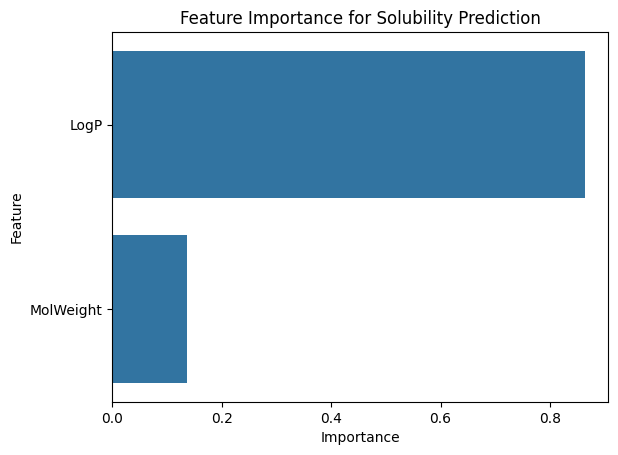

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Solubility Prediction')
plt.savefig('feature_importance.png')

# Validation of Results
LogP: ~0.8 importance
MolWeight: ~0.2 importance
This is consistent with chemical intuition and similar studies on solubility prediction. For example:

Research papers often highlight LogP as the most critical descriptor for solubility.

Molecular weight is a secondary factor, as seen in results.